# Capítulo 3

#### Esfera de Bloch

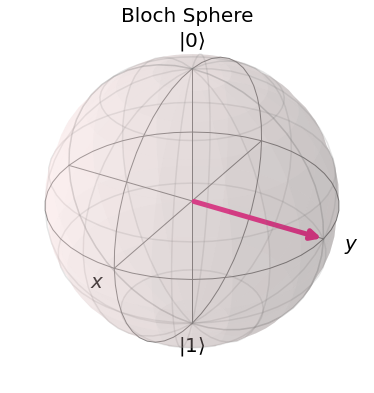

In [1]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([0,1,0], title="Bloch Sphere")

## 3.1 Puertas cuánticas

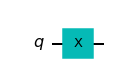

In [2]:
#Pauli-X
from qiskit import QuantumCircuit
from qiskit.tools.visualization import circuit_drawer

qc = QuantumCircuit(1)
qc.x(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

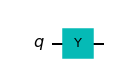

In [4]:
#Pauli-Y
qc = QuantumCircuit(1)
qc.y(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

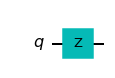

In [5]:
#Pauli-Z
qc = QuantumCircuit(1)
qc.z(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

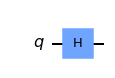

In [6]:
#Hadamard
qc = QuantumCircuit(1)
qc.h(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

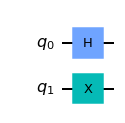

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

## 3.2 Puertas de varios qubits

#### CNOT

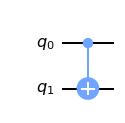

In [14]:
qc = QuantumCircuit(2)
qc.cnot(0,1)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [15]:
#Vamos a simular la puerta CNOT para encontrar la matriz asociada


from qiskit import QuantumCircuit, Aer, assemble

import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [16]:
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

#### Circuito de Bell


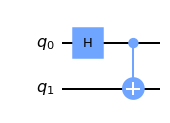

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0,1)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

#### CNOT circuit identity


In [20]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
#print(qc.draw(output='latex_source'))
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")


┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

#### Toffoli gate

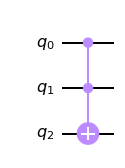

In [21]:
qc=QuantumCircuit(3)
qc.ccx(0,1,2)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Medición

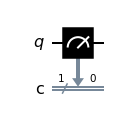

In [22]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)
#print(qc.draw(output='latex_source'))
qc.draw('mpl')

## Circuitos cuánticos

#### NAND con Toffoli

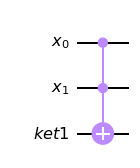

In [32]:
from qiskit import QuantumRegister

A = QuantumRegister(1,name='x_0')
B = QuantumRegister(1,name='x_1')
In = QuantumRegister(1,name='ket{1}')
qc = QuantumCircuit(A,B,In)
qc.ccx(A,B,In)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Intercambiar qubits

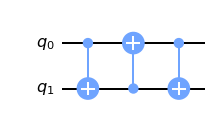

In [31]:
qc=QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

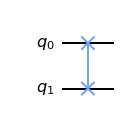

In [33]:
q = QuantumCircuit(2)
q.swap(0,1)
q.draw(output='mpl')

### Bell states

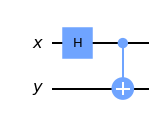

In [36]:
#Circuito de Bell
x = QuantumRegister(1,name='x')
y = QuantumRegister(1,name='y')
qc = QuantumCircuit(x,y)
qc.h(0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Teleportación cuántica

In [38]:
from qiskit import ClassicalRegister

psi = QuantumRegister(1,name='ket{\psi}')
beta = QuantumRegister(1,name='ket{\beta_{xy}^B')
medidor = ClassicalRegister(2,'medicion')
qc = QuantumCircuit(psi,beta,medidor)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
#print(qc.draw(output='latex_source'))
qc.draw()

┌───┐     ┌─┐   
      ket{\psi}: ┤ H ├──■──┤M├───
                 └───┘┌─┴─┐└╥┘┌─┐
ket{eta_{xy}^B: ─────┤ X ├─╫─┤M├
                      └───┘ ║ └╥┘
     medicion: 2/═══════════╩══╩═
                            0  1

In [39]:
m1 = QuantumRegister(1,name='m1')
m2 = QuantumRegister(1,name='m2')
beta = QuantumRegister(1,name='ket{\beta_{xy}^B}')
qc = QuantumCircuit(m1,m2,beta)
qc.cx(0,2)
qc.cz(1,2)

#print(qc.draw(output='latex_source'))
qc.draw()

m1: ──■─────
                    │     
              m2: ──┼───■─
                  ┌─┴─┐ │ 
ket{eta_{xy}^B}: ┤ X ├─■─
                  └───┘